In [1]:
5.41-2.85

2.56

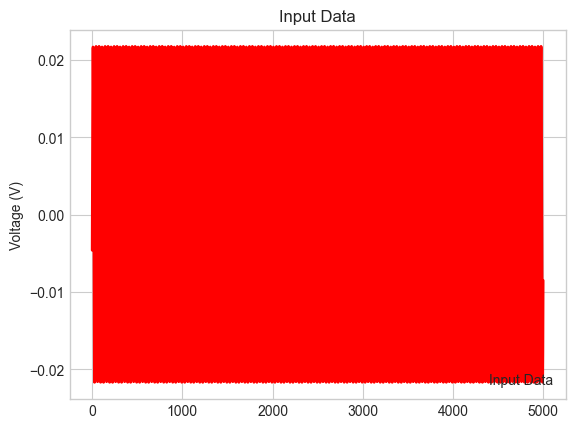

C:\Users\leisir\AppData\Local\Temp\ipykernel_23692\3593349822.py:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


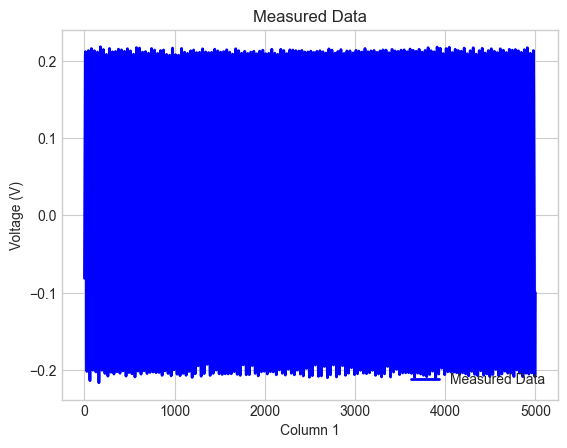

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Define the file name containing Chinese characters
file_name = '20230321_sensor1_标定正弦30Hz_15点43mVrms'

timeDelay = 3 # ms

# Read the file and extract the data columns
data = np.loadtxt(file_name)
col1 = data[:, 0]
col2 = data[:, 1]

MeasureNum = 6000

cropCol1 = col1[(1000+timeDelay):(MeasureNum+timeDelay)]  # Measure
cropCol2 = col2[1000:MeasureNum]  # Input

BInput = cropCol2 * 1000 #* 4.608 # V --> mV --> pT , mV
yMeasure = cropCol1 * 1000 # V --> mV
yMeasureCurrent = col1[1000:MeasureNum] * 1000


# Plot the input data
plt.figure()
plt.plot(cropCol2, linewidth=2, color='red', label='Input Data')
plt.title('Input Data')
plt.ylabel('Voltage (V)')
plt.legend(loc='lower right')
plt.show()

# Plot the measured data
plt.figure()
plt.style.use('seaborn-whitegrid')
plt.plot(cropCol1, linewidth=2, color='blue', label='Measured Data')
plt.title('Measured Data')
plt.xlabel('Column 1')
plt.ylabel('Voltage (V)')
plt.legend(loc='lower right')
plt.show()

# Define the scaling factor and phase shift for the reference curve
# Kscale = 5.82 * 1e7
# Phi = 0.0

# # Define the state transition matrix
# A = np.array([[0.]])

# # Define the control input matrix
# B = np.array([[0.0064]])

# # Define the measurement matrix
# D = np.array([[Kscale]])

# # Define the process noise covariance matrix
# Q = np.array([[0.05]])

# # Define the measurement noise covariance matrix
# R = np.array([[3]])

# # Initialize the state vector
# x = np.array([[0.]])

# # Initialize the state covariance matrix
# P = np.array([[1]])

# # Define the constant term matrices
# C = np.array([[0.0]])
# E = np.array([[Phi]])
# zPred = []
# Run the Kalman filter
# for i in range(len(BInput)):
#     u = np.asarray([BInput[i]])
#     z = np.asarray([yMeasure[i]])
#     # Predict the next state estimate and covariance
#     x = A @ x + B @ u + C
#     P = A @ P @ A.T + Q
    
#     # Update the state estimate and covariance using the measurement
#     K = P @ D.T @ np.linalg.inv(D @ P @ D.T + R)
#     x = x + K @ (z - D @ x - E)
    
#     zPred.append(D@x+E)
    
#     P = (np.eye(1) - K @ D) @ P
    
    
    
    

# plt.figure()
# plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Reference', color='blue')
# plt.plot(timeRange, zPred, markersize=5, linestyle='-', label='Prediction', alpha=0.5, color='red')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude (pT)')
# plt.title


In [108]:
95/(2*np.pi*30)

0.5039906531243353

In [109]:
import numpy as np
from scipy.fft import fft, ifft

# Generate sample data for two sine waves with a phase difference of pi/4 radians
t = np.linspace(0, 1, 1000)
f = 30
x1 = np.sin(2*np.pi*f*t)
x2 = np.sin(2*np.pi*f*t + np.pi/4)

# Take the FFT of the two signals
X1 = fft(x1)
X2 = fft(x2)

# Find the cross-correlation of the two signals
C = ifft(X1 * np.conj(X2))

# Find the time delay (in seconds) corresponding to the peak of the cross-correlation
delay = t[np.argmax(C)]

# Find the phase difference (in radians) corresponding to the time delay
period = 1/f
phase_diff = (delay * 2 * np.pi) / period

print("Time delay: {:.3f} s".format(delay))
print("Phase difference: {:.3f} radians".format(phase_diff))


Time delay: 0.004 s
Phase difference: 0.755 radians


In [110]:
np.pi/4

0.7853981633974483

In [111]:

# timeRange = np.array([1/1000 * i for i in range(len(BInput))])
# corr = np.correlate(BInput*9.2843, yMeasure, mode='same')

# # Find the index of the peak in the correlation signal
# peak_index = np.argmax(corr)


# X1 = fft(BInput*9.2843)
# X2 = fft(yMeasure)

# # Find the cross-correlation of the two signals
# C = ifft(X1 * np.conj(X2))

# # Find the time delay (in seconds) corresponding to the peak of the cross-correlation
# delay = timeRange[np.argmax(C)]

# print('Delay s: ', delay)


# # Compute the phase difference between the two signals
# phase_diff = timeRange[peak_index] - timeRange[0]

# plt.plot(timeRange, corr, label='Cross-correlation')
# plt.axvline(timeRange[peak_index], color='r', linestyle='--', label='Peak')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Phase difference = {:.2f} radians'.format(phase_diff))
# plt.legend()
# plt.show()



In [112]:
# import numpy as np

# # Define system matrices
# A = np.array([[0.5, 0], [0, 1]])
# B = np.array([[1], [0]])
# C = np.array([[0, 1]])
# D = np.array([[0]])
# Q = np.eye(2) * 0.01  # Process noise covariance
# R = np.eye(1) * 0.1   # Measurement noise covariance
# x0 = np.array([[0], [0]])  # Initial state
# P0 = np.eye(2) * 0.1  # Initial state covariance

# # Define time delay
# d = 1

# # Initialize state estimate and covariance
# x = x0
# P = P0

# # Loop over time steps
# for t in range(100):
#     # Predict state and covariance
#     x_pred = A @ x + B * u
#     P_pred = A @ P @ A.T + Q
    
#     # Compute Kalman gain
#     K = P_pred @ C.T @ np.linalg.inv(C @ P_pred @ C.T + R)
    
#     # Update state and covariance
#     y = np.array([[t]])  # Example measurement
#     x = x_pred + K @ (y - C @ np.array([[0, 1]]) @ x_pred)
#     P = (np.eye(2) - K @ C @ np.array([[0, 1]])) @ P_pred
    
#     # Shift state and covariance for next time step
#     x


In [113]:
from filterpy.kalman import KalmanFilter

#zPred = np.asarray(zPred).reshape(-1)
zRef = 9.2843 * BInput
Kscale = 9.2843
# Plot the predicted and reference curves
timeRange = np.array([1/1000 * i for i in range(len(BInput))])
Q1 = 0
Q2 = 9.2845*1e-5
#Q2 = 11.2845*1e-5

GRpsn = 6.3246*1e-3
#GRpsn = 0.0286

tracker = KalmanFilter(dim_x=2, dim_z=1, dim_u=1)
dt = 1/1000   # time step 1 second

tracker.F = np.array([[0, 0],[9.2846*1e-2, 0]])

from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise

q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)
tracker.Q = np.array([[Q1**2, 0],[0, Q2**2]])
print(tracker.Q, q)
tracker.B = np.array([[1],[0]])

tracker.H = np.array([[0, 1e2]])

tracker.R = np.array([[GRpsn**2]])

tracker.x = np.array([[0],[0]])
tracker.P = np.eye(2) * 1.

mu, cov, _, _ = tracker.batch_filter(yMeasure, us=BInput)

mu0 = mu[:,0,:].reshape(-1)
mu1 = mu[:,1,:].reshape(-1)
KF_estimate_In = mu0 
KF_estimate_Measure = mu1 * 1e2

[[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.62019402e-09]] [[2.5e-15 5.0e-12]
 [5.0e-12 1.0e-08]]


In [114]:
mu, cov, _, _ = tracker.batch_filter(yMeasure, us=BInput)
mu.shape

(5000, 2, 1)

C:\Users\leisir\AppData\Local\Temp\ipykernel_23692\3964297420.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


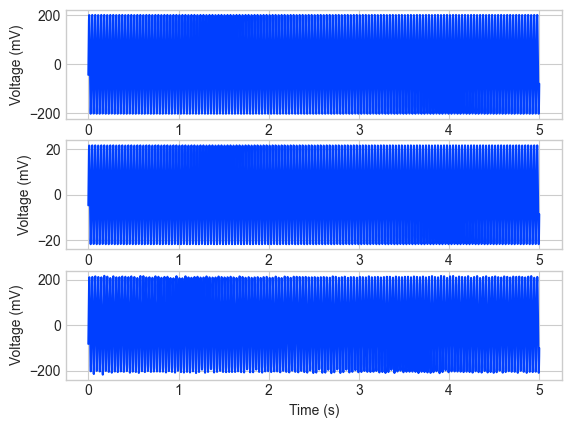

In [115]:
plt.style.use('seaborn-bright')

plt.subplot(3, 1, 1)
plt.plot(timeRange, zRef)
plt.ylabel('Voltage (mV)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(timeRange, KF_estimate_In)
plt.ylabel('Voltage (mV)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(timeRange, yMeasure)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(True)


C:\Users\leisir\AppData\Local\Temp\ipykernel_23692\1768254562.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


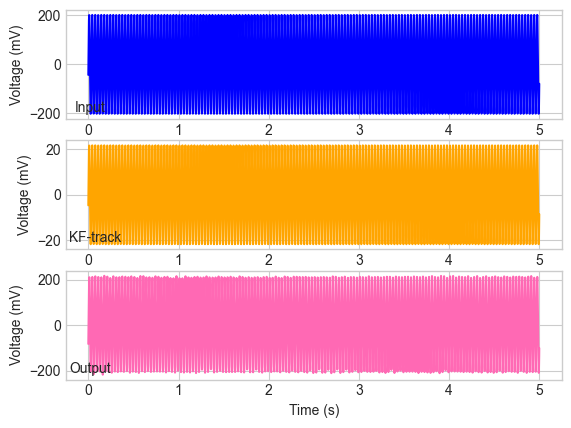

In [116]:
plt.style.use('seaborn-bright')

plt.subplot(3, 1, 1)
plt.plot(timeRange, zRef, color='blue')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.05, 0.1, 'Input', transform=plt.gca().transAxes, ha='center', va='center')

plt.subplot(3, 1, 2)
plt.plot(timeRange, KF_estimate_In, color='orange')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.06, 0.1, 'KF-track', transform=plt.gca().transAxes, ha='center', va='center')

plt.subplot(3, 1, 3)
plt.plot(timeRange, yMeasure, color='#FF69B4')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.05, 0.1, 'Output', transform=plt.gca().transAxes, ha='center', va='center')

plt.savefig('KF_Tri_30Hz.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'KF on the zRef curve')

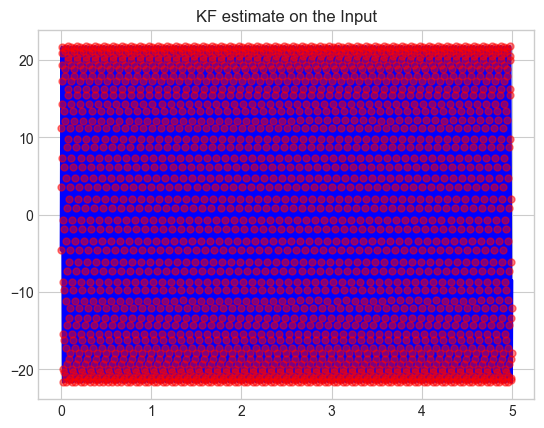

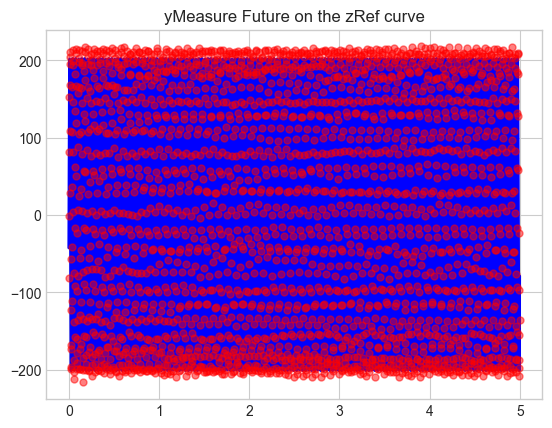

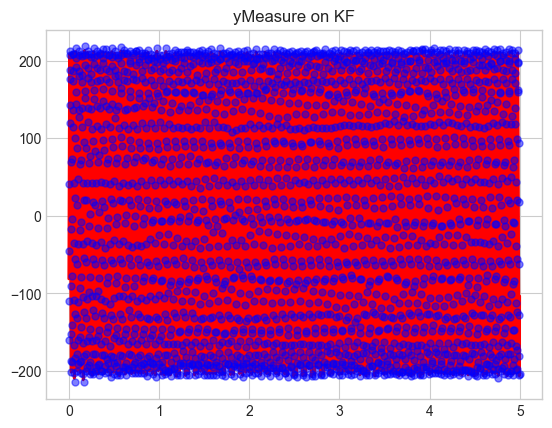

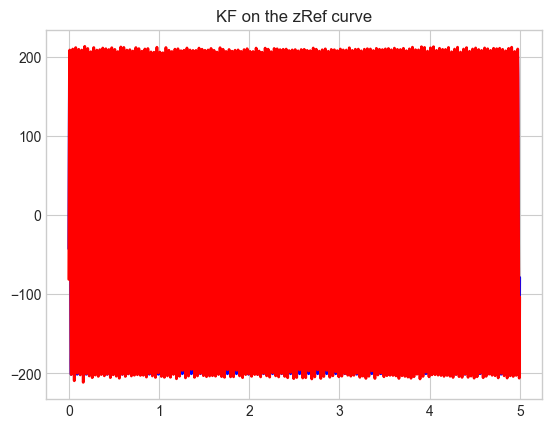

In [117]:
# plt.figure()
# plt.plot(timeRange, BInput, linestyle='-', linewidth=2, label='Ref', color='blue')
# plt.plot(timeRange[::2], KF_estimate_In[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
# plt.title('KF estimate on the Input curve')

plt.figure()
plt.plot(timeRange, BInput, linestyle='-', linewidth=2, label='Ref', color='blue')
plt.plot(timeRange[::2], KF_estimate_In[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.title('KF estimate on the Input')


plt.figure()
plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
plt.plot(timeRange[::2], yMeasure[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.title('yMeasure Future on the zRef curve')

plt.figure()
plt.plot(timeRange, KF_estimate_Measure, linestyle='-', linewidth=2, label='Ref', color='red')
plt.plot(timeRange[::2], yMeasureCurrent[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='blue')
plt.title('yMeasure on KF')


plt.figure()
plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
#plt.plot(timeRange[::2], KF_estimate_Measure[::2], '0', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.plot(timeRange, KF_estimate_Measure, linestyle='-', linewidth=2, label='KF', color='red')

plt.title('KF on the zRef curve')


In [118]:
# X1 = fft(BInput*9.2843)
# X2 = fft(yMeasure)

# # Find the cross-correlation of the two signals
# C = ifft(X1 * np.conj(X2))

# # Find the time delay (in seconds) corresponding to the peak of the cross-correlation
# delay = timeRange[np.argmax(C)]

# print('Delay KF s: ', delay)

In [119]:
# X1 = fft(zRef)
# X2 = fft(KF_estimate_Measure)

# # Find the cross-correlation of the two signals
# C = ifft(X1 * np.conj(X2))

# # Find the time delay (in seconds) corresponding to the peak of the cross-correlation
# delay = timeRange[np.argmax(C)]

# print('Delay KF s: ', delay)

# # Compute the phase difference between the two signals
# phase_diff = timeRange[peak_index] - timeRange[0]

# plt.plot(timeRange, corr, label='Cross-correlation')
# plt.axvline(timeRange[peak_index], color='r', linestyle='--', label='Peak')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Phase difference = {:.2f} radians'.format(phase_diff))
# plt.legend()
# plt.show()

Text(0.5, 1.0, 'KF estimate on the Ref curve')

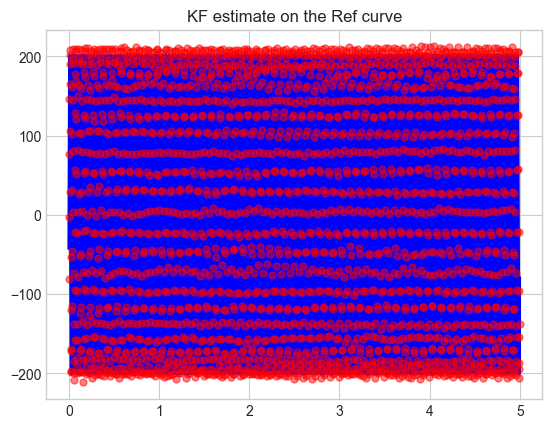

In [120]:
plt.figure()
plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
plt.plot(timeRange[::2], KF_estimate_Measure[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.title('KF estimate on the Ref curve')

Text(0.5, 1.0, 'KF err on yMeasure_Current')

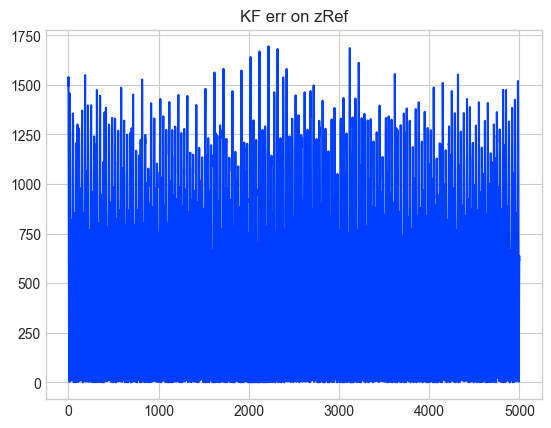

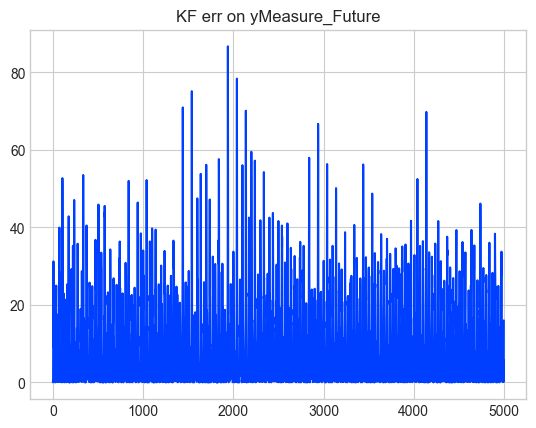

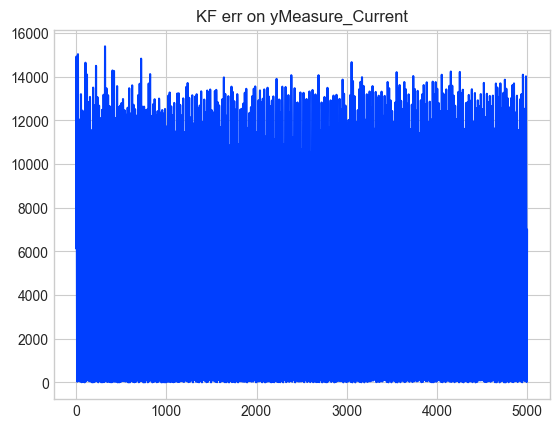

In [121]:
# 误差图绘制
Bin_err = KF_estimate_Measure - zRef
Measure_err = KF_estimate_Measure - yMeasure
Measure_err_Current = KF_estimate_Measure - yMeasureCurrent

plt.figure()
plt.plot(Bin_err**2)
plt.title('KF err on zRef')

plt.figure()
plt.plot(Measure_err**2)
plt.title('KF err on yMeasure_Future')


plt.figure()
plt.plot(Measure_err_Current**2)
plt.title('KF err on yMeasure_Current')

(array([  2.,   5.,   4.,  15.,  26.,  41.,  80., 176., 258., 308., 335.,
        316., 254., 265., 247., 249., 241., 217., 271., 271., 338., 339.,
        331., 215., 107.,  50.,  24.,   9.,   4.,   2.]),
 array([-9.3104008 , -8.80227625, -8.2941517 , -7.78602715, -7.27790261,
        -6.76977806, -6.26165351, -5.75352897, -5.24540442, -4.73727987,
        -4.22915532, -3.72103078, -3.21290623, -2.70478168, -2.19665714,
        -1.68853259, -1.18040804, -0.67228349, -0.16415895,  0.3439656 ,
         0.85209015,  1.36021469,  1.86833924,  2.37646379,  2.88458834,
         3.39271288,  3.90083743,  4.40896198,  4.91708652,  5.42521107,
         5.93333562]),
 <BarContainer object of 30 artists>)

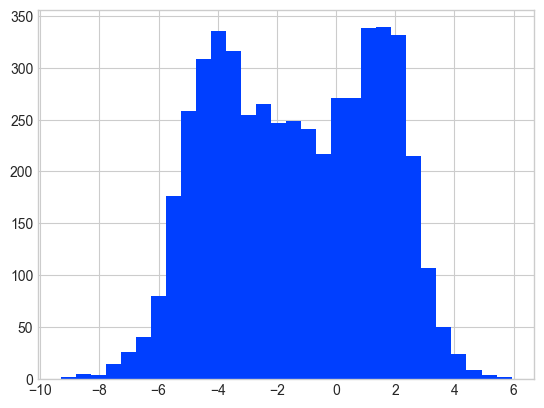

In [122]:
plt.hist(Measure_err, bins=30)

In [123]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import welch

# print(timeRange.shape, yMeasure.shape)
# # Compute the power spectral density using Welch's method , nperseg=1024
# f, Pxx = welch(timeRange, yMeasure, nperseg=1024)

# # Plot the power spectral density
# plt.figure()
# plt.semilogy(f, Pxx)
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Power Spectral Density [V**2/Hz]')
# plt.title('PSD of a Sine-like Curve (Log scale)')
# plt.grid()
# plt.show()



(array([  4.,  17.,  96., 291., 328., 301., 214., 179., 136., 139., 170.,
        110., 152., 127., 134., 142., 128., 137., 158., 125., 145., 152.,
        137., 161., 201., 202., 302., 380., 203.,  29.]),
 array([-39.24009664, -36.5599336 , -33.87977057, -31.19960753,
        -28.51944449, -25.83928146, -23.15911842, -20.47895539,
        -17.79879235, -15.11862931, -12.43846628,  -9.75830324,
         -7.07814021,  -4.39797717,  -1.71781413,   0.9623489 ,
          3.64251194,   6.32267497,   9.00283801,  11.68300105,
         14.36316408,  17.04332712,  19.72349015,  22.40365319,
         25.08381623,  27.76397926,  30.4441423 ,  33.12430533,
         35.80446837,  38.48463141,  41.16479444]),
 <BarContainer object of 30 artists>)

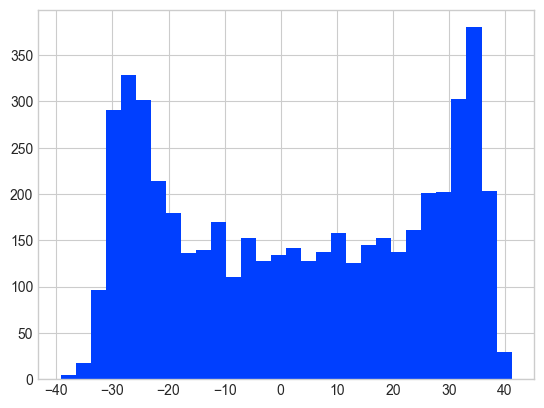

In [124]:
plt.hist(Bin_err, bins=30)

In [125]:
np.savetxt('./result/yMeasure_30Hz.txt', yMeasure)
np.savetxt('./result/KF_y_30Hz.txt', KF_estimate_Measure)

In [126]:
from scipy.spatial.distance import euclidean

KF_distance = euclidean(KF_estimate_Measure, zRef)/len(timeRange)
Measure_distance = euclidean(yMeasureCurrent, zRef)/len(timeRange)

print("Euclidean distance between the KF curves:", KF_distance)
print("Euclidean distance between the Measure curves:", Measure_distance)

Euclidean distance between the KF curves: 0.33219895558799806
Euclidean distance between the Measure curves: 1.434155912426374
